In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [120]:
X,Y=make_blobs(n_samples=1000,n_features=2,center_box=(-2,2),centers=2,random_state=2)

In [46]:
X

array([[ 0.4437919 , -1.81265878],
       [-0.23475954, -0.98537756],
       [ 0.15808336, -2.91928329],
       ...,
       [-0.15652113, -4.30052113],
       [-0.64264617, -2.78087278],
       [-0.28096434, -1.82071804]])

In [124]:
X[:,0]

array([ 4.43791896e-01, -2.34759542e-01,  1.58083357e-01, -1.96282919e-01,
        1.32849832e+00, -5.13145361e-01,  1.27341665e-01, -2.90705757e-01,
        7.85299309e-01,  5.75297022e-01, -9.56298479e-01,  4.45993133e-01,
        5.92556904e-02, -5.39539908e-01,  1.43821372e+00,  5.71265379e-02,
        1.66812896e+00, -1.35475934e+00,  9.17511107e-01,  8.23203957e-01,
       -3.84280194e-01, -6.31689815e-01, -1.57358766e+00,  2.39568004e-01,
       -1.74595587e+00, -3.01208868e-01,  1.36819972e-01, -8.49775974e-01,
       -2.57973304e-01,  2.54617105e-02, -6.76402888e-01,  7.44345495e-01,
       -8.56540797e-01, -7.12869706e-01,  6.54079772e-01,  2.62904533e-01,
        1.40499767e-01,  1.01650050e+00,  7.33331868e-01,  5.60156428e-01,
        8.32838075e-01,  3.79343366e-01,  1.10449457e+00,  4.92307682e-01,
       -6.75336874e-01,  1.70997066e-01, -1.49073785e+00,  1.21165762e+00,
       -1.19501939e+00,  3.38288766e-01,  8.79223326e-02,  5.79198772e-01,
       -1.27743512e+00, -

In [58]:
new_point=np.array([-0.5,-1.5])

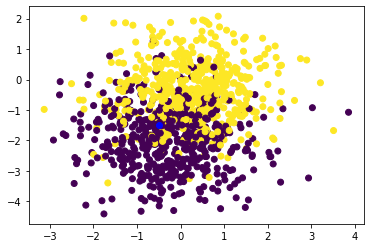

In [59]:
plt.scatter(X[:,0],X[:,1],c=Y)
plt.scatter(new_point[0],new_point[1],c='blue')

plt.show()

In [87]:
def KNN(X,Y,new_point,k=5):
    dis_l=[]
    m=X.shape[0]

    for i in range(m):
        dis=distance(X[i],new_point)
        dis_l.append([dis,Y[i]])
    
    dis_l=sorted(dis_l)
    dis_l=np.array(dis_l)[:k]
    unique=np.unique(dis_l[:,1],return_counts=True)
    out=np.argmax(unique[1])
    
    return int(unique[0][out])



In [91]:
new_point=np.array([-0.25,-0.75])

In [92]:
KNN(X,Y,new_point)

1

In [60]:
arr=[1,2,1,1,4,5,6,6,6]
np.unique(arr,return_counts=True)

(array([1, 2, 4, 5, 6]), array([3, 1, 1, 1, 3]))

In [61]:
def distance(a,b):
    return np.sqrt( (np.sum((a-b)**2) ))


# Sklearn for KNN

In [93]:
from sklearn.neighbors import KNeighborsClassifier


In [94]:
df=pd.read_csv('diabetes.csv')

In [95]:
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [99]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [100]:
from sklearn.preprocessing import StandardScaler

In [101]:
sc_X=StandardScaler()

In [103]:
X=pd.DataFrame(sc_X.fit_transform(df.drop(['Outcome'],axis=1),),columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'])

In [104]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496
...,...,...,...,...,...,...,...,...
763,1.827813,-0.622642,0.356432,1.722735,0.870031,0.115169,-0.908682,2.532136
764,-0.547919,0.034598,0.046245,0.405445,-0.692891,0.610154,-0.398282,-0.531023
765,0.342981,0.003301,0.149641,0.154533,0.279594,-0.735190,-0.685193,-0.275760
766,-0.844885,0.159787,-0.470732,-1.288212,-0.692891,-0.240205,-0.371101,1.170732


In [105]:
Y=df['Outcome']
Y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [ ]:
X=df[:,1]
Y=df[:,-1]

In [106]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.20,random_state=42)

In [111]:
X_test


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
668,0.639947,-0.716533,-0.574128,0.781814,0.956860,0.254780,-0.126471,0.830381
324,-0.547919,-0.278373,0.304734,0.719086,-0.692891,0.470543,-0.978145,-1.041549
624,-0.547919,-0.403562,-0.263941,-1.288212,-0.692891,-0.151361,-0.947944,-1.041549
690,1.233880,-0.434859,0.563223,-1.288212,-0.692891,-0.938260,1.160099,0.064591
473,0.936914,0.472758,1.080200,-1.288212,-0.692891,-0.265588,-0.790898,1.425995
...,...,...,...,...,...,...,...,...
355,1.530847,1.380375,0.976805,-1.288212,-0.692891,-0.202129,-0.513047,1.340908
534,-0.844885,-1.373774,-0.677523,0.593630,-0.206648,0.165937,2.353046,-0.786286
344,1.233880,-0.810425,0.149641,-1.288212,-0.692891,0.610154,0.039635,2.021610
296,-0.547919,0.785730,0.046245,1.095454,2.432952,-0.506735,-0.407342,-0.360847


In [110]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496
...,...,...,...,...,...,...,...,...
763,1.827813,-0.622642,0.356432,1.722735,0.870031,0.115169,-0.908682,2.532136
764,-0.547919,0.034598,0.046245,0.405445,-0.692891,0.610154,-0.398282,-0.531023
765,0.342981,0.003301,0.149641,0.154533,0.279594,-0.735190,-0.685193,-0.275760
766,-0.844885,0.159787,-0.470732,-1.288212,-0.692891,-0.240205,-0.371101,1.170732


In [114]:
knn=KNeighborsClassifier(3)
knn.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=3)

In [116]:
knn.score(X_train,Y_train)

0.8615635179153095

In [118]:
knn.score(X_test,Y_test)

0.7012987012987013